In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from scipy.special import expit
import scipy.optimize as opt

from pprint import pprint

%matplotlib inline

plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = 8.0, 5.5

colors = cm.Set1.colors

In [2]:
headers = ['Exam Score 1', 'Exam Score 2', 'Admitted']
df = pd.read_csv('./Machine Learning Course/machine-learning-ex2/ex2/ex2data1.txt', names=headers)
df['Exam Score 2 Sqr.'] = np.power(df['Exam Score 2'], 2)
df

,Exam Score 1,Exam Score 2,Admitted,Exam Score 2 Sqr.
0,34.623660,78.024693,0,6087.852689
1,30.286711,43.894998,0,1926.770808
2,35.847409,72.902198,0,5314.730477
3,60.182599,86.308552,1,7449.166165
4,79.032736,75.344376,1,5676.775061
5,45.083277,56.316372,0,3171.533731
6,61.106665,96.511426,1,9314.455326
7,75.024746,46.554014,1,2167.276177
8,76.098787,87.420570,1,7642.356010
9,84.432820,43.533393,1,1895.156333


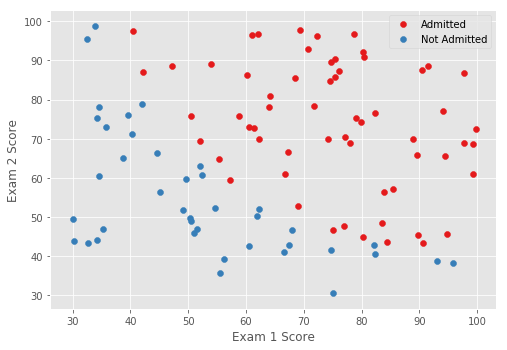

In [3]:
df_admitted = df[df['Admitted'] == 1]
df_rejected = df[df['Admitted'] == 0]

fig = plt.figure(num=1)

sct_admitted = plt.scatter(df_admitted['Exam Score 1'], df_admitted['Exam Score 2'], color=colors[0])
sct_rejected = plt.scatter(df_rejected['Exam Score 1'], df_rejected['Exam Score 2'], color=colors[1])

plt.legend(['Admitted', 'Not Admitted'])
plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')

plt.show()

In [4]:
global costs

def costFunction(theta, X, y, regTerm=0):
    global costs
    
    theta = theta.reshape((n, 1))
    m = y.shape[0]
    
    h = expit(X.dot(theta))
    
    leftJ = y.T.dot(np.log(h))
    rightJ = (1 - y).T.dot(np.log(1-h))
    
    cost = (np.sum(-leftJ) + np.sum(-rightJ)) / m
    reg_cost = regTerm * theta.T[:, 1:].dot(theta[1:]) / (2 * m)
    
    #print('cost')
    #pprint(theta.T[:, 1:])
    #pprint(theta[1:])
    #pprint(cost)
    #pprint(reg_cost)
    #print('end cost')
    
    costs.append(cost + reg_cost)
    return cost + reg_cost

def gradient(theta, X, y, regTerm=0):
    theta = theta.reshape((n, 1))

    m = y.shape[0]
    h = expit(X.dot(theta))

    grad = X.T.dot(h-y) / m
    
    reg_grad = np.zeros(theta.shape)
    reg_grad[1:] = regTerm * theta[1:] / m
    
    #print('grad')
    #pprint(grad.shape)
    #pprint(reg_grad.shape)
    #print('end grad')
    
    return (grad.values + reg_grad).flatten()
    #return (grad + reg_grad)
    
def predict(theta, X):
    probs = expit(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probs]

     fun: array([[ 0.1697276]])
     jac: array([  4.21650915e-03,   4.10516414e-01,  -2.71335884e-01,
        -4.23691955e+01])
 message: 'Max. number of function evaluations reached'
    nfev: 100
     nit: 27
  status: 3
 success: False
       x: array([ -2.95337639e+01,   1.79471505e-01,   4.47366544e-01,
        -2.20511718e-03])

final_theta: [ -2.95337639e+01   1.79471505e-01   4.47366544e-01  -2.20511718e-03]
final cost: [[ 0.16903054]]
accuracy: 95.0%


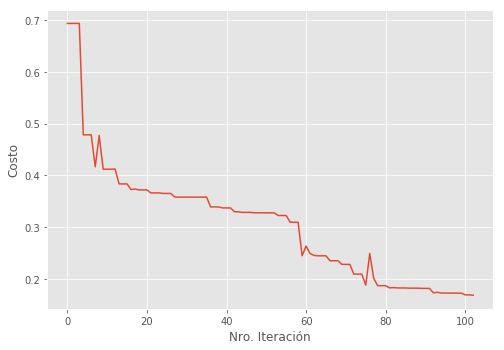

In [5]:
global costs
costs = []

y = df.iloc[:, 2].values.reshape(-1, 1)
m = y.shape[0]

X = df.iloc[:, [0, 1, 3]]
X = pd.concat((pd.Series(np.ones(m)), X), axis=1)

_, n = X.shape

initial_theta = np.zeros(n)
costFunction(initial_theta, X, y)

result = opt.minimize(
    fun=costFunction,
    x0=initial_theta,
    args=(X, y, 0.6), 
    jac=gradient,
    method='TNC',
    options={'disp': True, 'maxiter': 100}
)

print(result)
final_theta = result['x']
final_cost = costFunction(final_theta, X, y)

predictions = predict(result['x'], X)
correct = [1 if (a == b) else 0 for (a, b) in zip(predictions, y)]
accuracy = sum(correct) * 100 / m

print()
print('final_theta: ' + str(final_theta))
print('final cost: {}'.format(final_cost))
print('accuracy: {}%'.format(accuracy))

costs = np.array(costs).flatten()

plt.plot(range(len(costs)), costs)
plt.xlabel('Nro. Iteración')
plt.ylabel('Costo')
plt.show()

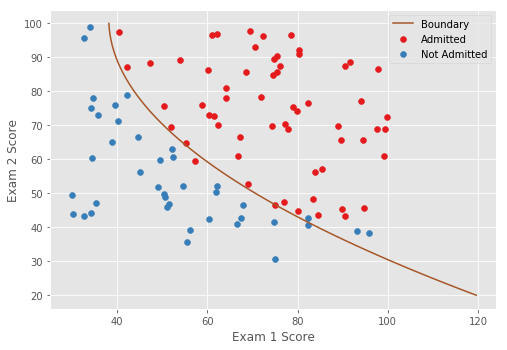

In [6]:
sct_admitted = plt.scatter(
    df_admitted['Exam Score 1'],
    df_admitted['Exam Score 2'],
    color=colors[0],
    label='Admitted'
)

sct_rejected = plt.scatter(
    df_rejected['Exam Score 1'],
    df_rejected['Exam Score 2'],
    color=colors[1],
    label='Not Admitted'
)

def f(theta, x):
    return -(theta[0] + theta[2] * x + theta[3] * np.power(x, 2)) / theta[1]

y_plot = np.linspace(20, 100)
x_plot = f(final_theta, y_plot)
plt.plot(x_plot, y_plot, label='Boundary', color=colors[6])

plt.legend()

plt.xlabel('Exam 1 Score')
plt.ylabel('Exam 2 Score')
plt.show()